<a href="https://colab.research.google.com/github/riskakurniaa/Machine-Learning/blob/Jobsheet4/Tugas2_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : **Riska Kurnia Triwulandari**  
Kelas : **3A**  
NIM   : **2241720039**

###**Tugas 2**
Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

In [1]:
from google.colab import files

uploaded = files.upload()

Saving images.zip to images.zip


Mengekstrak file ZIP dan membaca file - file yang telah diekstrak

In [2]:
import zipfile
import os

# Extract the uploaded zip file
zip_path = 'images.zip'
extract_dir = 'extracted_images/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the files in the extracted directory
extracted_files = os.listdir(extract_dir)
extracted_files

['__MACOSX', 'images']

Mengekstrak histogram warna dari gambar pada direktori file dan mengelompokkan hasilnya berdasarkan label yang diambil dari nama folder asal.

In [3]:
import cv2
import numpy as np
import os

def is_image_file(filename):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']
    return any(filename.lower().endswith(ext) for ext in valid_extensions)

def extract_histogram(image_path):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    if not is_image_file(image_path):
        raise ValueError(f"Not a supported image file: {image_path}")

    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Failed to load image: {image_path}")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    hist_r = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([image], [2], None, [256], [0, 256])

    hist = np.concatenate((hist_r, hist_g, hist_b)).flatten()
    return hist

# Extract histograms and labels for all images
features = []
labels = []

for root, dirs, files in os.walk('extracted_images'):
    if '__MACOSX' in dirs:
        dirs.remove('__MACOSX')
    for file in files:
        if is_image_file(file):
            file_path = os.path.join(root, file)
            try:
                hist = extract_histogram(file_path)
                features.append(hist)
                # Extract label from the parent folder name
                label = os.path.basename(os.path.dirname(file_path))
                labels.append(label)
                print(f"Processed: {file_path}")
            except Exception as e:
                print(f"Error processing {file_path}: {str(e)}")

features = np.array(features)
labels = np.array(labels)

print(f"Features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Unique labels: {np.unique(labels)}")

Processed: extracted_images/images/training/night/20151101_105513.jpg
Processed: extracted_images/images/training/night/20151102_182948.jpg
Processed: extracted_images/images/training/night/20151102_180022.jpg
Processed: extracted_images/images/training/night/20151102_180523.jpg
Processed: extracted_images/images/training/night/20151102_183443.jpg
Processed: extracted_images/images/training/night/20151102_000151.jpg
Processed: extracted_images/images/training/night/20151102_024124.jpg
Processed: extracted_images/images/training/night/20151102_092044.jpg
Processed: extracted_images/images/training/night/20151102_090105.jpg
Processed: extracted_images/images/training/night/20151103_164129.jpg
Processed: extracted_images/images/training/night/20151102_215224.jpg
Processed: extracted_images/images/training/night/20151101_132459.jpg
Processed: extracted_images/images/training/night/20151102_022047.jpg
Processed: extracted_images/images/training/night/20151103_021930.jpg
Processed: extracted

Mencoba SVM pada fitur histogram gambar, serta melakukan evaluasi dan penyimpanan model.

Classification Report:
              precision    recall  f1-score   support

         day       0.97      1.00      0.99        38
       night       1.00      0.98      0.99        42

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



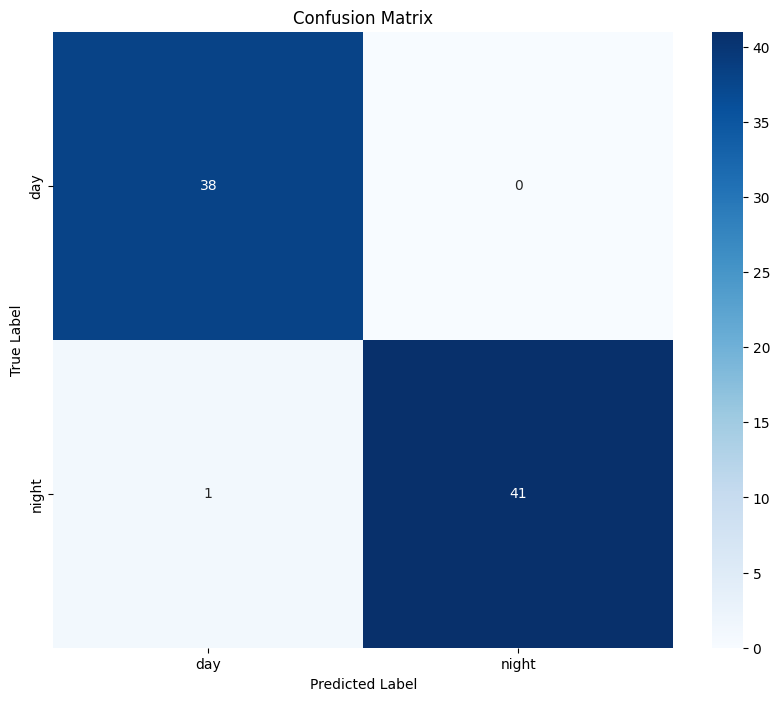

['label_encoder.joblib']

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Persiapkan data
X = features  # No need to convert to np.array again
y = labels    # No need to convert to np.array again

# Encode string labels to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# 2. Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Buat dan latih model SVM
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 5. Lakukan prediksi pada set pengujian
y_pred = svm_model.predict(X_test_scaled)

# 6. Evaluasi model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 7. Visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

from joblib import dump
dump(svm_model, 'svm_model.joblib')
dump(scaler, 'scaler.joblib')
dump(le, 'label_encoder.joblib')